# PCA  (análisis de componente principal)

**PCA** es una transformación lineal usada para reducir dimensiones en los datos.

¿Por qué reducir dimensiones?

Existen varias razones, entre ellas:
+ Mejora de la performance
+ Mejor manejo de la dispersión de los datos
+ Maldición de las dimensiones (ojo-también existe la bendición)
+ etc...


Hay dos maneras diferentes de hacer ésta transformación:

+ A través de la matriz de correlaciones (dimensiones no homogéneas)
+ A través de la matriz de covarianzas (dimensiones homogéneas)

Ambas matrices son simétricas y diagonalizables. De hecho, el Teorema Espectral dice que si una matriz es hermítica, cuadrada y de dimensión finita, entonces existe una base de vectores propios donde dicha matriz puede ser representada.
Esto quiere decir que podemos cambiar de base para después proyectar, reduciendo las dimensiones e intentando conservar la máxima información en el nuevo subespacio.

![gio1](data/gioconda.jpeg)
![gio2](data/gioconda_lego.png)

### Ejemplo intuitivo

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline

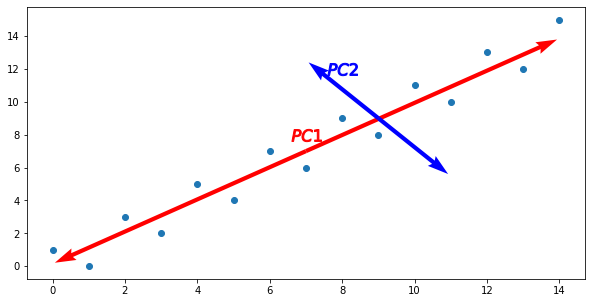

In [2]:
plt.figure(figsize=(10, 5))
plt.scatter([i for i in range(15)],
            [i+1 if i%2==0 else i-1 for i in range(15)])

plt.quiver(7, 7, 9, 4, color='r', scale=20)
plt.quiver(7, 7, -9, -4, color='r', scale=20)
plt.plot(7, 8, marker='$PC1$', ms=30, color='r')

plt.quiver(9, 9, -5, 4, color='b', scale=40)
plt.quiver(9, 9, 5, -4, color='b', scale=40)
plt.plot(8, 12, marker='$PC2$', ms=30, color='b');

Se rota y se proyecta, resultando:

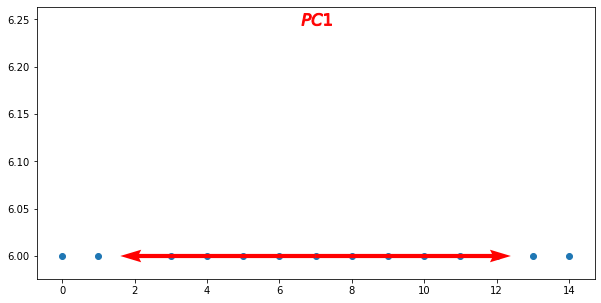

In [3]:
plt.figure(figsize=(10, 5))
plt.scatter([i for i in range(15)],
            [6 for i in range(15)])

plt.quiver(7, 6, 7, 0, color='r', scale=20)
plt.quiver(7, 6, -7, 0, color='r', scale=20)
plt.plot(7, 6.25, marker='$PC1$', ms=30, color='r');

**Combinacion lineal**

v1> vector 1
v2> vector 2

comb lineal = 2*v1> - 4*v2>

**Combinacion no lineal**

comb no lineal = 2*v1>*v2>

##### Resumen PCA

+ Normalización de los datos
+ Obtener base de vectores propios desde matriz de correlacion o covarianza
+ Ordenar los vectores propios de mayor a menor según sus dimensiones en el nuevo subespacio
+ Matriz de proyección, con los autovectores seleccionados (W)
+ Se transforma X (los datos) según W (matriz de proyección)

In [4]:
import pandas as pd
import numpy as np

from sklearn.preprocessing import StandardScaler, MinMaxScaler  # normalizacion

from sklearn.decomposition import PCA    # PCA

import warnings
warnings.simplefilter('ignore')

In [5]:
data=pd.read_csv('data/pulsar_stars.csv')
data.head()

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,target_class
0,140.562500,55.683782,-0.234571,-0.699648,3.199833,19.110426,7.975532,74.242225,0
1,102.507812,58.882430,0.465318,-0.515088,1.677258,14.860146,10.576487,127.393580,0
2,103.015625,39.341649,0.323328,1.051164,3.121237,21.744669,7.735822,63.171909,0
3,136.750000,57.178449,-0.068415,-0.636238,3.642977,20.959280,6.896499,53.593661,0
4,88.726562,40.672225,0.600866,1.123492,1.178930,11.468720,14.269573,252.567306,0


In [6]:
data=data.drop(columns=['target_class'])

#### normalización

Recordemos, el primer paso de PCA es la normalización de los datos. 

Primero, veamos la 'standarización'   ($N(\mu, \sigma)$):

$$\frac{x-\mu}{\frac{\sigma}{\sqrt{n}}}$$

In [7]:
data_n_mano=(data-np.mean(data))/np.std(data)

data_n=StandardScaler().fit_transform(data)

np.sum(data_n_mano-data_n)

 Mean of the integrated profile                  0.000000e+00
 Standard deviation of the integrated profile   -1.115067e-10
 Excess kurtosis of the integrated profile      -3.456999e-11
 Skewness of the integrated profile             -7.172045e-12
 Mean of the DM-SNR curve                        1.174245e-11
 Standard deviation of the DM-SNR curve         -9.144349e-11
 Excess kurtosis of the DM-SNR curve             2.822222e-11
 Skewness of the DM-SNR curve                    1.180685e-11
dtype: float64

Ahora el MinMax :

$$\frac{x-min}{max-min}$$

In [9]:
data_mm_mano=(data-np.min(data))/(np.max(data)-np.min(data))

data_mm=MinMaxScaler().fit_transform(data)

np.sum(data_mm_mano-data_mm)

 Mean of the integrated profile                  1.568736e-13
 Standard deviation of the integrated profile    5.605374e-14
 Excess kurtosis of the integrated profile       1.882314e-13
 Skewness of the integrated profile              2.829209e-14
 Mean of the DM-SNR curve                        1.212409e-13
 Standard deviation of the DM-SNR curve          4.598752e-14
 Excess kurtosis of the DM-SNR curve            -2.881462e-13
 Skewness of the DM-SNR curve                    6.918713e-14
dtype: float64

Se usa la standarización:

In [10]:
data=StandardScaler().fit_transform(data)

Se aplica **PCA**

In [13]:
pca=PCA()

pca.fit(data)

print (data.shape)
pca.explained_variance_ratio_

(17898, 8)


array([0.51675584, 0.26807564, 0.10116862, 0.0571781 , 0.03227836,
       0.01998491, 0.00255524, 0.00200328])

(0, 1.01)

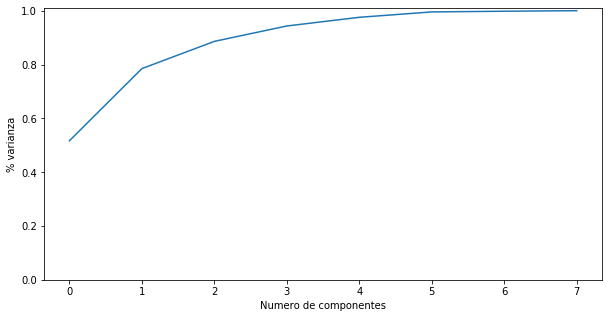

In [14]:
plt.figure(figsize=(10, 5))

plt.plot(np.cumsum(pca.explained_variance_ratio_))

plt.xlabel('Numero de componentes')
plt.ylabel('% varianza')
plt.ylim([0, 1.01])

In [16]:
pca=PCA(n_components=4)

df=pd.DataFrame(pca.fit_transform(data))

df.head()

,0,1,2,3
0,-1.278849,-1.273133,0.016213,0.662102
1,-1.020553,-0.201162,0.670478,1.605779
2,0.188289,0.432114,-0.979766,-0.519232
3,-1.015466,-1.469881,-0.018832,0.938386
4,-0.822626,2.123651,0.407953,-0.380922


In [17]:
pd.DataFrame(data).head()

,0,1,2,3,4,5,6,7
0,1.149317,1.334832,-0.669570,-0.400459,-0.319440,-0.370625,-0.072798,-0.287438
1,-0.334168,1.802265,-0.011785,-0.370535,-0.371102,-0.588924,0.504427,0.211581
2,-0.314372,-1.053322,-0.145233,-0.116593,-0.322107,-0.235328,-0.125996,-0.391373
3,1.000694,1.553254,-0.513409,-0.390178,-0.304404,-0.275666,-0.312265,-0.481300
4,-0.871402,-0.858879,0.115609,-0.104866,-0.388010,-0.763111,1.324026,1.386794


In [18]:
pd.DataFrame(pca.inverse_transform(df)).head()

,0,1,2,3,4,5,6,7
0,0.726963,1.327427,-0.735075,-0.783587,-0.337221,-0.257022,-0.070554,-0.255592
1,-0.038332,1.811110,0.059444,-0.129622,-0.454226,-0.587282,0.417421,0.287539
2,-0.059363,-1.046436,-0.031402,0.033576,-0.428290,-0.159977,-0.140189,-0.349821
3,0.623153,1.549935,-0.607552,-0.691777,-0.309245,-0.172273,-0.269003,-0.486495
4,-0.366730,-0.849173,0.255278,0.285361,-0.451494,-0.797759,1.303397,1.398872


# ICA (análisis de componente independiente)

Es la generalización de PCA. También es una transformación lineal, pero no requiere que los datos sigan una distribución Normal.


### Ejemplo
##### Problema de la fiesta:
Se intentan separar la voces de una grabación de audio...

In [28]:
from scipy import signal
from sklearn.decomposition import FastICA

In [29]:
time=np.linspace(0, 8, 2000)  # tiempo

s1=np.sin(2*time)    # señal seno

s2=np.sign(np.sin(3*time))  # señal onda cuadrada

s3=signal.sawtooth(2*np.pi*time)   # señal dientes de sierra

In [30]:
S=np.c_[s1, s2, s3]     # concateno señales

S+=0.1*np.random.normal(size=S.shape)  # ruido

S/=S.std(axis=0)   # normalizacion

In [31]:
A=np.array([[1,1,1], [0.5, 2, 1], [1.5, 1, 2]])  # operador mezcla de señal

X=np.dot(S, A.T)      # observaciones

In [32]:
ica=FastICA(n_components=3)

S_ica=ica.fit_transform(X)   # señal extraida de ica

A_ica=ica.mixing_# operador mezcla de señal de ica

In [33]:
pca=PCA(n_components=3)    # para comparar
S_pca=pca.fit_transform(X)

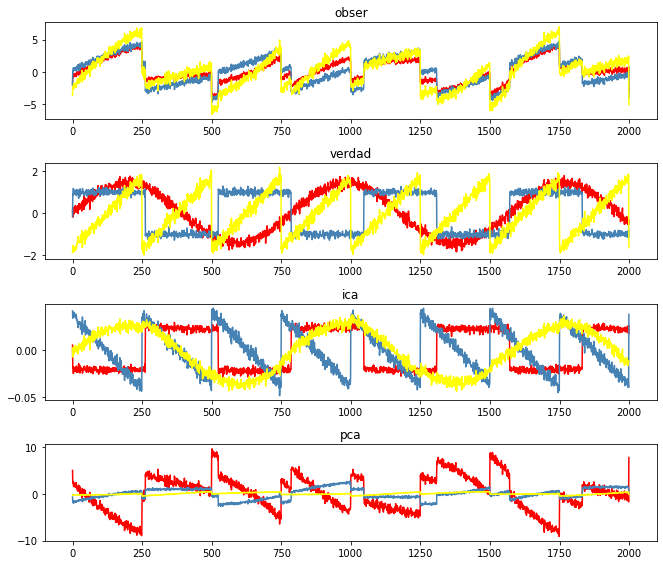

In [34]:
plt.figure(figsize=(10, 8))

nombres=['obser', 'verdad', 'ica', 'pca']

modelos=[X, S, S_ica, S_pca]

colores=['red', 'steelblue', 'yellow']

for i , (m,n) in enumerate(zip(modelos, nombres), 1):
    plt.subplot(4, 1, i)
    plt.title(n)
    
    for sig, c in zip(m.T, colores):
        plt.plot(sig, color=c)
        
plt.subplots_adjust(0.09, 0.04, 0.94, 0.94, 0.26, 0.46)

plt.show();

# UMAP (uniform manifold aprox and projection)

In [36]:
import umap

import seaborn as sns

from sklearn.datasets import load_iris

In [38]:
load_iris().data.shape

(150, 4)

In [39]:
load_iris().target.shape

(150,)

In [40]:
redu=umap.UMAP(n_components=2).fit_transform(load_iris().data)

redu.shape

(150, 2)

Text(0.5, 1.0, 'Proyeccion UMAP')

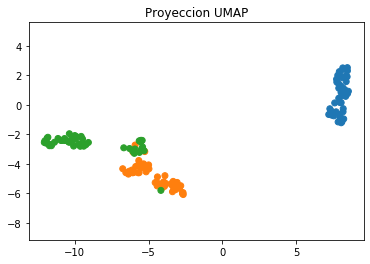

In [42]:
plt.scatter(redu[:,0], redu[:, 1], c=[sns.color_palette()[x] for x in load_iris().target])
plt.gca().set_aspect('equal', 'datalim')
plt.title('Proyeccion UMAP')

# Series Temporales

### Autoregresión

El modelo usa la relación de dependencia del momento actual con $n$ momentos anteriores. Es, en realidad, una regresión lineal.

$$y_t = \beta_0+\beta_1y_{t-1}+\beta_2y_{t-2}+\ldots+\beta_ny_{t-n}+\epsilon_t$$

Si solamente nos fijamos en el momento anterior, $t-1$, entonces:

$$y_t = \beta_0+\beta_1y_{t-1}$$

Es la llamada Cadena de Markov

In [ ]:
# AR


### Media Móvil (Moving Average MA)

Una manera matemática de expresar la MA puede ser:

$$y_t = \beta_0+\epsilon_t+\epsilon_t\phi_{t-1}+\epsilon_t\phi_{t-2}+\ldots+\epsilon_t\phi_{t-n}$$


Se usa la relación entre las observaciones y el error residual de la media móvil.

Otra es la evidente, la media móvil, se muestra en el gráfico.

In [ ]:
plt.figure(figsize=(10, 5))

plt.plot(dias.values)

plt.plot([50, 80],[1000, 1000], color='black')
plt.plot([50, 50],[1000, 1100], color='black')
plt.plot([50, 80],[1100, 1100], color='black')
plt.plot([80, 80],[1000, 1100], color='black')

plt.quiver(80, 1050, 1, 0, scale=20, color='r');


### ARMA (AutoRegressive Moving Average)

Unión de ambos conceptos.

$$y_t = \beta_0 + \epsilon_t + \sum_{i=1}^{n}\beta_iy_{t-i} + \sum_{i=1}^{n}\phi_i\epsilon_{t-i}$$

In [ ]:
# ARMA  order==> p=>AR, q=>MA


### ARIMA (AutoRegressive Integrated Moving Average)

Lo de Integrated trata de hacer la serie temporal estacionaria, similar al concepto de PID.

In [ ]:
# ARIMA  order==> (p, d, q)  d=>Integrated


In [ ]:
# ADF-test (testeo de la estacionaridad)

### SARIMA (Seasonal AutoRegressive Integrated Moving Average)
Arima por estaciones.

### SARIMAX (Seasonal AutoRegressive Integrated Moving Average Exogenous)
SARIMA con regresores exógenos.


# FB-Prophet

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from fbprophet import Prophet
from sklearn.metrics import mean_squared_error, mean_absolute_error

plt.style.use('fivethirtyeight')

In [ ]:
# datos, consumo de energia

pjme=pd.read_csv('data/PJME_hourly.csv', index_col=[0], parse_dates=[0])
pjme.tail()

In [ ]:
_=pjme.plot(style='.', figsize=(15, 5), color='r', title='PJME')

In [ ]:
# se definen las caracteristicas temporales

def features(df, label):
    df=df.copy()
    df['date']=df.index
    df['hour']=df.date.dt.hour
    df['day_of_week']=df.date.dt.dayofweek
    df['quarter']=df.date.dt.quarter
    df['month']=df.date.dt.month
    df['year']=df.date.dt.year
    df['day_of_year']=df.date.dt.dayofyear
    df['day_of_month']=df.date.dt.day
    df['week_of_year']=df.date.dt.weekofyear
    
    X=df[['hour', 'day_of_week', 'quarter', 'month', 'year',
          'day_of_year', 'day_of_month', 'week_of_year']]
    y=df[label]
    
    return X,y

In [ ]:
X, y = features(pjme, 'PJME_MW')
data=pd.concat([X, y], axis=1)
data.head()

In [ ]:
sns.pairplot(data.dropna(), hue='hour', 
            x_vars=['hour', 'day_of_week', 'year', 'week_of_year'],
            y_vars='PJME_MW', height=5, plot_kws={'alpha':0.1, 'linewidth':0})

plt.suptitle('MW por hora, dia, dia de la semana, y semana del año')
plt.show();

In [ ]:
split_date='01-Jan-2015'

train=pjme.loc[pjme.index<=split_date].copy()
test=pjme.loc[pjme.index>split_date].copy()

_=test.rename(columns={'PJME_MW': 'Test'})\
      .join(train.rename(columns={'PJME_MW': 'Train'}), how='outer')\
      .plot(figsize=(15,5), title='PJME', style='.')

In [ ]:
# modelo

train=train.reset_index().rename(columns={'Datetime':'ds', 'PJME_MW':'y'})
test=test.reset_index().rename(columns={'Datetime':'ds', 'PJME_MW':'y'})
train.head()

In [ ]:
modelo=Prophet().fit(train)

pred=modelo.predict(test)

In [ ]:
f, ax=plt.subplots(1)
f.set_figheight(5)
f.set_figwidth(15)
fig=modelo.plot(pred, ax=ax)

In [ ]:
# comparando

f, ax=plt.subplots(1)
f.set_figheight(5)
f.set_figwidth(15)
ax.scatter(test.ds, test.y, color='r')
fig=modelo.plot(pred, ax)

In [ ]:
# metricas de error

mean_squared_error(test.y, pred.yhat)**0.5

In [ ]:
mean_absolute_error(test.y, pred.yhat)

In [ ]:
def mape(y_true, y_pred):
    y_true, y_pred=np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true-y_pred)/y_true))*100

In [ ]:
mape(test.y, pred.yhat)

In [ ]:
fig = modelo.plot_components(pred)

In [ ]:
# Con vacaciones

from pandas.tseries.holiday import USFederalHolidayCalendar as calendar

cal = calendar()
train_h = cal.holidays(train.index.min(), train.index.max())
test_h = cal.holidays(test.index.min(), test.index.max())

In [ ]:
pjme['date'] = pjme.index.date
pjme['is_holiday'] = pjme.date.isin([d.date() for d in cal.holidays()])
df_h = pjme.loc[pjme['is_holiday']].reset_index().rename(columns={'Datetime':'ds'})
df_h['holiday'] = 'USFederalHoliday'
df_h = df_h.drop(['PJME_MW','date','is_holiday'], axis=1)
df_h.head()

In [ ]:
modelo_h = Prophet(holidays=df_h).fit(train)

fig2=modelo_h.plot_components(pred)

In [ ]:
pred_h=modelo.predict(test)
pred_h.head()

In [ ]:
mean_squared_error(test.y, pred_h.yhat)**0.5

In [ ]:
mean_absolute_error(test.y, pred_h.yhat)

In [ ]:
mape(test.y, pred_h.yhat)